In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Problem Statement: To predict the if an emoployee will be eligible for promotion based on various variables in the Data.

In The Industry, Hr executives and managers spend lot of time on Normalizing the data and identifying the right person with tallents to be eligible for a promotion or a hike, and often employees feel there is a bias because it is a human decision. By peforming this kind of an model, it will elimiate the two main problems.

1. The time taken to process,validate and take the decision on who will be promoted.

2. The decision will be taken purely on performance metrics and we can eliminate any bias during decsion making.

#  Part- 1 Data Understanding & Exploration

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Here we have two datasets, one is the training dataset which already has the pre-defined target variable "is_promoted" and other one is the testing dataset which is for testing purpose on which we need to deter mine the is_promoted column

In [6]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [7]:
test.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


The next Process is DATA UNDERSTANDING:

I am going to do some exploratary Data Analytics to understand the different aspects of Data. We will be performing, univariate analysis, bi-variate analysis, skewness tests, variable type analysis, null value analysis with the help of some graphs and will interpret the data.

In [8]:
train.shape

(54808, 14)

In [9]:
test.shape

(23490, 13)

In [11]:
# Looking at the data types in the train dataset
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [13]:
# Looking at the descriptive statisticts of the train data set such as the mean, median, max, min etc.
# The describe function will only calculate the descriptive statistics properly for int and flot datatypes properly
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
# Checking how many unique values are there in each column which will help to understand how many categories are tehre in the object reolated columns
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [21]:
print("The unique values in department are:",train['department'].unique())

print("The unique values in region are:",train['region'].unique())

print("The unique values in education are:",train['education'].unique())

print("The unique values in gender are:",train['gender'].unique())

print("The unique values in recruitment_channel are:",train['recruitment_channel'].unique())

The unique values in department are: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
The unique values in region are: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
The unique values in education are: ["Master's & above" "Bachelor's" nan 'Below Secondary']
The unique values in gender are: ['f' 'm']
The unique values in recruitment_channel are: ['sourcing' 'other' 'referred']


In [22]:
# Analysing the columns to check if they have null values in it
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Looking at the data, I can see that only two columns have null values which are education and previous_year_rating

In [23]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Even the test dat has some null values in it.

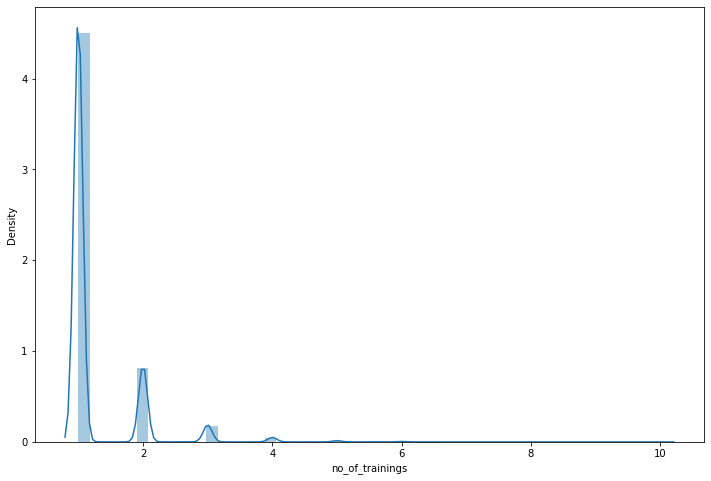

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(train['no_of_trainings'])
plt.show()

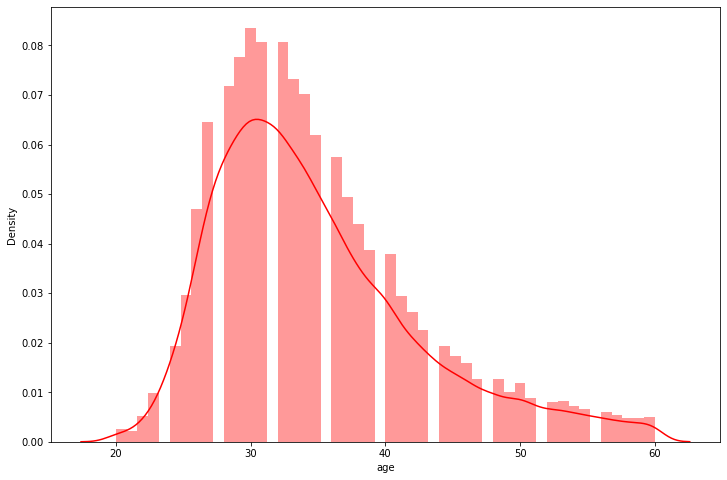

In [29]:
plt.figure(figsize=(12,8))
sns.distplot(train['age'],color='r')
plt.show()

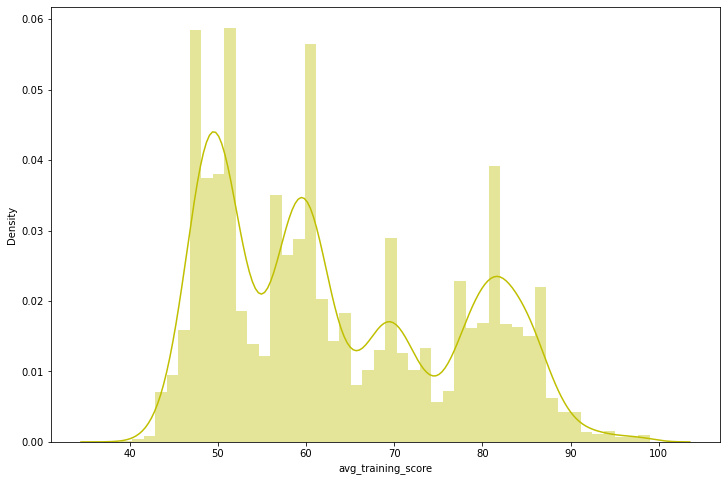

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(train['avg_training_score'],color='y')
plt.show()

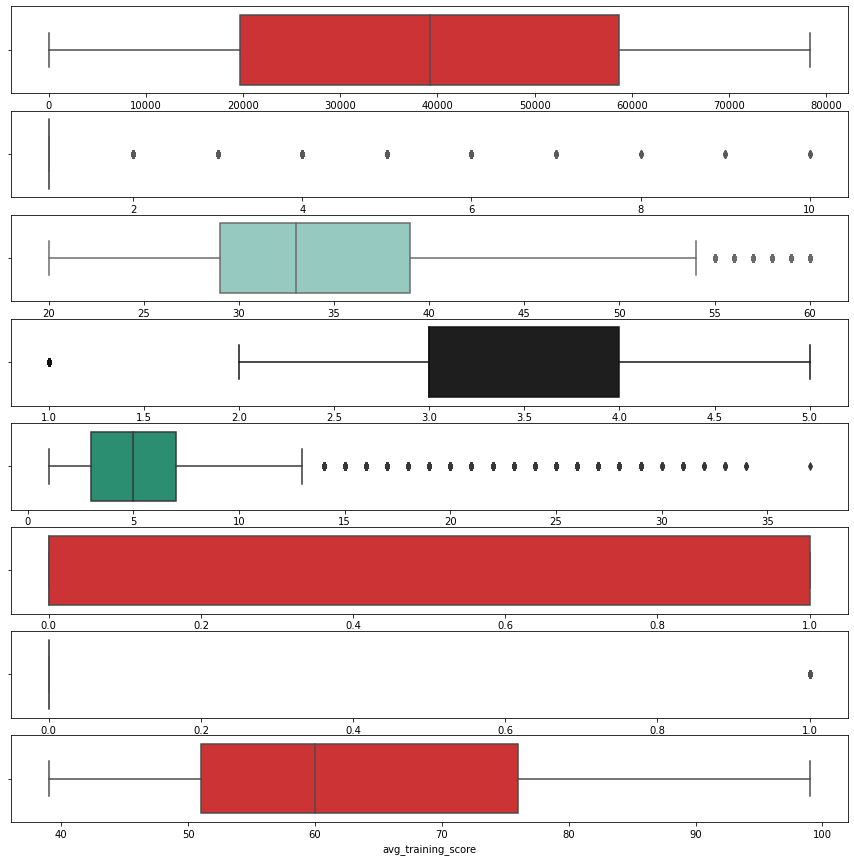

In [33]:
# Analysis to find if therea are any outliers in the data
fig, axarr = plt.subplots(8, 1, figsize=(15, 15))

sns.boxplot(train['employee_id'],palette='Set1',ax=axarr[0])
sns.boxplot(train['no_of_trainings'],palette='Set2',ax=axarr[1])
sns.boxplot(train['age'],palette='Set3',ax=axarr[2])
sns.boxplot(train['previous_year_rating'],palette='icefire',ax=axarr[3])
sns.boxplot(train['length_of_service'],palette='Dark2',ax=axarr[4])
sns.boxplot(train['KPIs_met >80%'],palette='Set1',ax=axarr[5])
sns.boxplot(train['awards_won?'],palette='plasma',ax=axarr[6])
sns.boxplot(train['avg_training_score'],palette='Set1',ax=axarr[7])
plt.show()

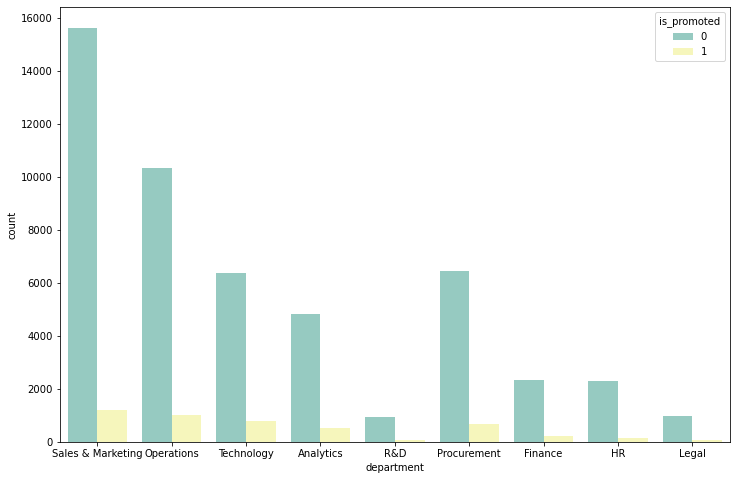

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(train['department'],hue=train['is_promoted'],palette='Set3')
plt.show()

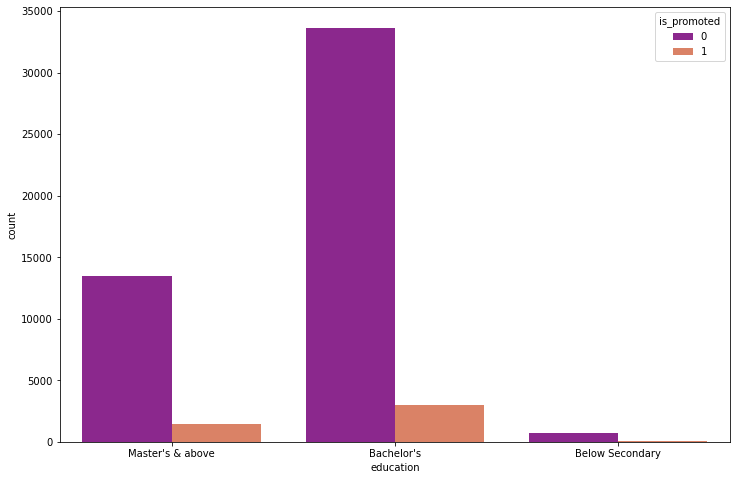

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(train['education'],hue=train['is_promoted'],palette='plasma')
plt.show()

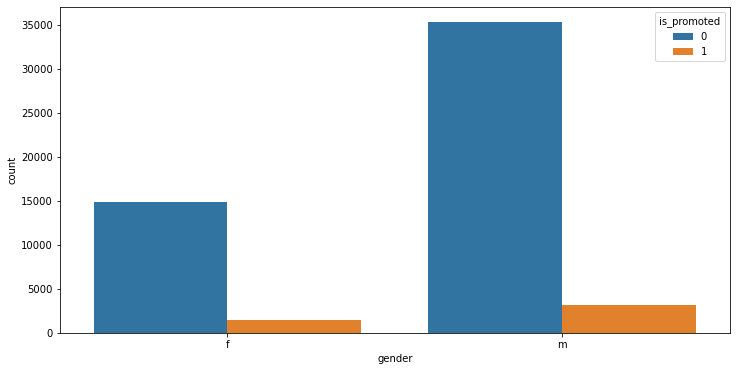

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(train['gender'],hue=train['is_promoted'])
plt.show()

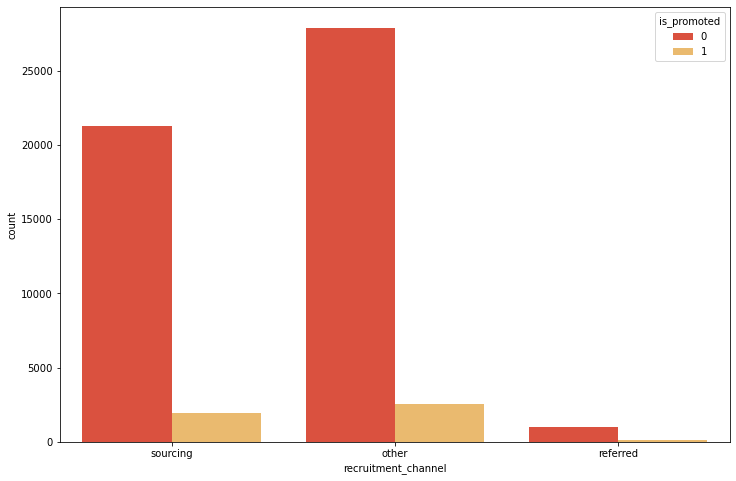

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(train['recruitment_channel'],hue=train['is_promoted'],palette='YlOrRd_r')

plt.show()

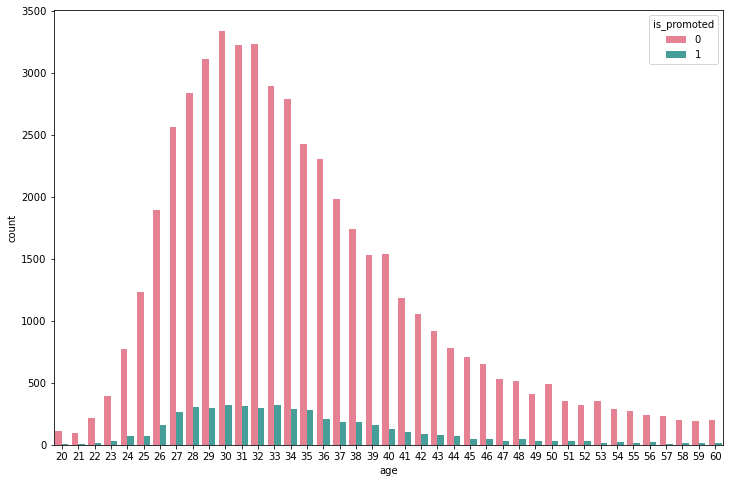

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(train['age'],hue=train['is_promoted'],palette='husl')
plt.show()

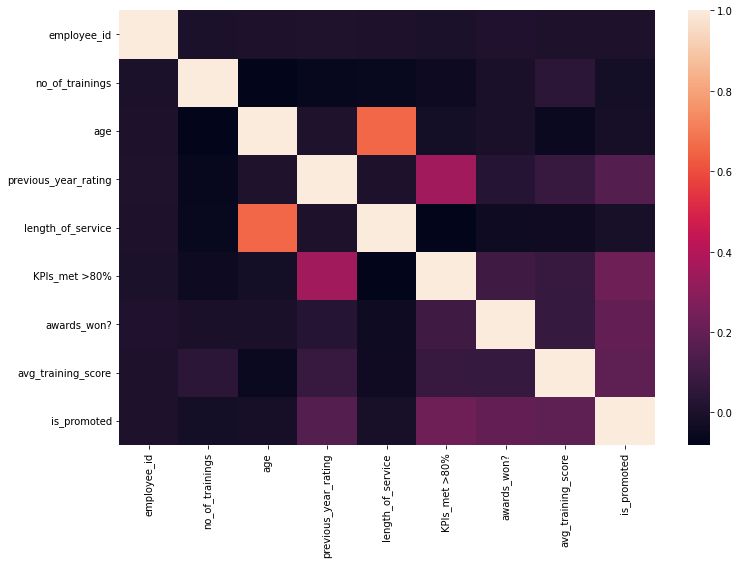

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr())
plt.show()

In [45]:
# we need to deal with the null values before we proceed to the modelling
# The null values are in the columns, education and previous year ratings
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

Looking at the data we can see that there is no person who has 0 as the rating. So ideally the assumption is they are freshers candidates who do not have any ratings so we can mark their ratings as 0

In [50]:
train['previous_year_rating']=train['previous_year_rating'].fillna(0.0)

In [51]:
train['previous_year_rating'].unique()

array([5., 3., 1., 4., 0., 2.])

In [52]:
# Now lets understand how education column is having nulls
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [53]:
# Since there are lot of nulls and we cannot assume the education of the employees, so I want to mark them as others
train['education']=train['education'].fillna('Others')

In [54]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Others', 'Below Secondary'],
      dtype=object)

In [56]:
test['previous_year_rating']=test['previous_year_rating'].fillna(0.0)
test['education']=test['education'].fillna('Others')

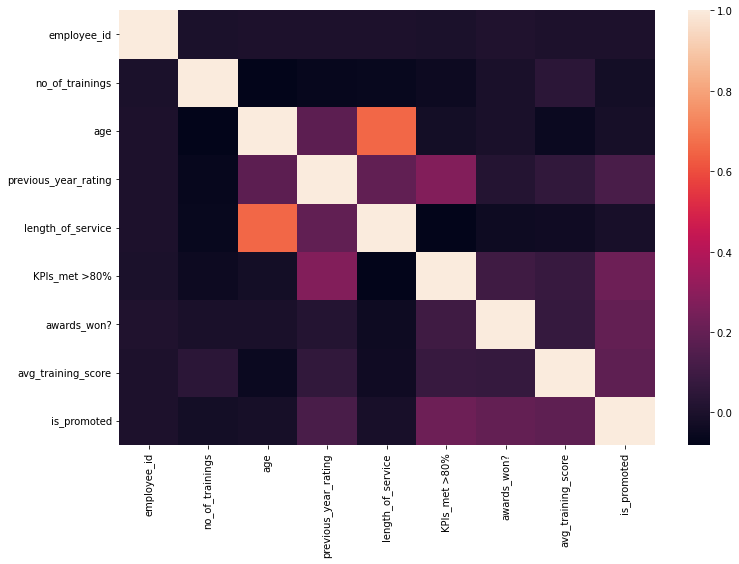

In [55]:
# I want to look at the heatmap once again after removing the null values
plt.figure(figsize=(12,8))
sns.heatmap(train.corr())
plt.show()

Ther seems to be no big change in the correlation between the columns, the only posotive correlation can be seen between the length_of_service and the age

#  Modelling

In [57]:
# lets first drop the columns that are not needed for the modelling purpose.
new_train = train.drop('employee_id',1)
new_test = test.drop('employee_id',1)

In [58]:
# The next step is to prepare the data for modelling
x=new_train.drop('is_promoted',1)
y=new_train.is_promoted

In [59]:
x=pd.get_dummies(x)

In [60]:
test_var=pd.get_dummies(new_test)

In [61]:
# importing functions from packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,recall_score,accuracy_score,confusion_matrix

In [62]:
lg=LogisticRegression()

In [63]:
lg.fit(x,y)
pred=lg.predict(test_var)

In [64]:
f1_score(y,lg.predict(x))

0.2807608146776637

In [65]:
recall_score(y,lg.predict(x))

0.17866323907455012

In [66]:
accuracy_score(y,lg.predict(x))

0.9220369289154868

In [67]:
confusion_matrix(y,lg.predict(x))

array([[49701,   439],
       [ 3834,   834]])

In [68]:
test_var['is_promoted']=pred

In [71]:
# The next idea is to perform kfold cross validation to find out which is the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb

In [72]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [73]:
# To find the best parameters for the decision tree
from sklearn.model_selection import GridSearchCV
param={'max_depth':np.arange(1,40),'criterion':['entropy','gini']}
Gs=GridSearchCV(dt,param,cv=3,scoring='f1_weighted')
Gs.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='f1_weighted')

In [74]:
Gs.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [75]:
dt=DecisionTreeClassifier(max_depth=11,criterion='entropy')

In [77]:
rf=RandomForestClassifier()

In [78]:
# Find the best parameters for random forest
param={'n_estimators':np.arange(1,40),'criterion':['entropy','gini']}
Gs=GridSearchCV(rf,param,cv=3,scoring='f1_weighted')
Gs.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='f1_weighted')

In [79]:
Gs.best_params_

{'criterion': 'entropy', 'n_estimators': 31}

In [80]:
rf=RandomForestClassifier(n_estimators=31,criterion='entropy')

In [81]:
nb=GaussianNB()

In [83]:
xgb_model=xgb.XGBClassifier()

In [84]:
param={'max_depth':[7,8,9],'n_estimators':[900,1000,1100],'objective':['binary:logistic'],'reg_alpha':[0.3,0.4,0.5],'learning_rate':[0.01]}
Gs=GridSearchCV(xgb_model,param,cv=3,scoring='f1_weighted',n_jobs=2,verbose=True)
Gs.fit(x,y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [85]:
Gs.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 1100,
 'objective': 'binary:logistic',
 'reg_alpha': 0.3}

In [86]:
bagdt=BaggingClassifier(base_estimator=dt,n_estimators=150,random_state=0)
baglr=BaggingClassifier(base_estimator=lr,n_estimators=10,random_state=0)
bagnb=BaggingClassifier(base_estimator=nb,n_estimators=10,random_state=0)
boodt=AdaBoostClassifier(base_estimator=dt,n_estimators=80,random_state=0)
boorf=AdaBoostClassifier(base_estimator=rf,n_estimators=50,random_state=0)
boolr=AdaBoostClassifier(base_estimator=lr,n_estimators=50,random_state=0)
boonb=AdaBoostClassifier(base_estimator=nb,n_estimators=50,random_state=0)
gboost=GradientBoostingClassifier(n_estimators=700,random_state=0)
xgb_model=xgb.XGBClassifier(learning_rate=0.01,max_depth=8,n_estimators=1100,objective='binary:logistic',reg_alpha=0.3,num_round=20)

In [87]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 2, shuffle=True, random_state=2)
for model, name in zip([lr,dt,rf,nb,bagdt,baglr,bagnb,boodt,boolr,boonb,boorf,gboost,xgb_model],
                       ['Logistic regression','decision tree','random forest','naive bayes',
                        'bagged_decision tree','bagged_logistic regression','bagged_naive bayes',
                        'boosted_decision tree','boosted_logistic regression','boosted_naive bayes','boosted_random forest',
                       'gradient boost','xgboost']):
    k=0
    recall = np.zeros((2,2))
    prec = np.zeros((2,2))
    fscore = np.zeros((2,2))
    for train,test in kf.split(x,y):
        xtrain,xtest = x.iloc[train,:],x.iloc[test,:]
        ytrain,ytest = y[train],y[test]
        model.fit(xtrain,ytrain)
        y_predict= model.predict(xtest)
        cm = confusion_matrix(ytest,y_predict)
        for i in np.arange(0,2):
            recall[i,k] = cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,2):
            prec[i,k] = cm[i,i]/cm[:,i].sum()
        k = k+1
    for row in np.arange(0,2):
        for col in np.arange(0,2):
            fscore[row,col]=2*(recall[row,col]*prec[row,col])/(recall[row,col]+prec[row,col])
    print('f1_score for class1: %0.02f (+/- %0.5f) [%s]' % (np.mean(fscore[0,:]), np.var(fscore[0,:], ddof = 1),name))
    print('f1_score for class2: %0.02f (+/- %0.5f) [%s]' % (np.mean(fscore[1,:]), np.var(fscore[1,:], ddof = 1),name))

    

f1_score for class1: 0.96 (+/- 0.00000) [Logistic regression]
f1_score for class2: 0.29 (+/- 0.00047) [Logistic regression]
f1_score for class1: 0.97 (+/- 0.00000) [decision tree]
f1_score for class2: 0.46 (+/- 0.00001) [decision tree]
f1_score for class1: 0.96 (+/- 0.00000) [random forest]
f1_score for class2: 0.41 (+/- 0.00043) [random forest]
f1_score for class1: 0.55 (+/- 0.01648) [naive bayes]
f1_score for class2: 0.20 (+/- 0.00014) [naive bayes]
f1_score for class1: 0.97 (+/- 0.00000) [bagged_decision tree]
f1_score for class2: 0.48 (+/- 0.00007) [bagged_decision tree]
f1_score for class1: 0.96 (+/- 0.00000) [bagged_logistic regression]
f1_score for class2: 0.28 (+/- 0.00001) [bagged_logistic regression]
f1_score for class1: 0.52 (+/- 0.00807) [bagged_naive bayes]
f1_score for class2: 0.19 (+/- 0.00001) [bagged_naive bayes]
f1_score for class1: 0.96 (+/- 0.00000) [boosted_decision tree]
f1_score for class2: 0.40 (+/- 0.00000) [boosted_decision tree]
f1_score for class1: 0.96 (+/-

Looking at the score gradient boost model seems to have a good f1 score so lets build the final model using that

In [88]:
trainingx=new_train.drop('is_promoted',1)
labels=new_train.is_promoted

trainingx=pd.get_dummies(trainingx)

In [89]:
testingx=pd.get_dummies(new_test)

In [90]:
model=gboost.fit(trainingx,labels)
pred=model.predict(testingx)

In [91]:
#training accuracy
accuracy_score(labels,model.predict(trainingx))

0.9449168004670851

In [92]:
f1_score(labels,model.predict(trainingx))

0.5330239752513535